# Cross-Sectional Momentum Strategy on Commodities

Simple vectorized strategy that longs the top quantile of commodities with best rolling momentum performance, using equal weighting among selected assets.

**Strategy Logic:**
- Calculate rolling cumulative returns over different lookback periods (5, 14, 30, 60, 90 days)
- Rank all commodities by rolling momentum signals
- Long the top quantile (e.g., top 25%) with equal weighting
- Daily rebalancing with no look-ahead bias
- Benchmark: Equal-weight allocation across all commodities

**Lookback Period Testing:**
- 5 days: Very short-term momentum (1 week)
- 14 days: Short-term momentum (~2-3 weeks)
- 30 days: Medium-term momentum (~1 month)
- 60 days: Longer-term momentum (~2-3 months)
- 90 days: Long-term momentum (~3-4 months)

In [1]:
import sys
import os
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import and reload the updated module
from cross_sectional_momentum import *
import importlib
import cross_sectional_momentum
importlib.reload(cross_sectional_momentum)
from cross_sectional_momentum import *

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.float_format', '{:.4f}'.format)

print("📊 Cross-Sectional Momentum Strategy Analysis (Updated with Rolling Lookback)")
print("=" * 80)

📊 Cross-Sectional Momentum Strategy Analysis (Updated with Rolling Lookback)


## 1. Load and Explore Commodities Data

In [2]:
# Load commodities data
prices = load_commodities_data('../data/commodities')

print(f"📈 Loaded {len(prices.columns)} commodities")
print(f"📅 Data period: {prices.index.min().strftime('%Y-%m-%d')} to {prices.index.max().strftime('%Y-%m-%d')}")
print(f"📏 Total observations: {len(prices)}")
print("\n🏷️ Available Commodities:")
for i, ticker in enumerate(prices.columns):
    print(f"  {i+1:2d}. {ticker}")

# Check data completeness
print("\n📊 Data Completeness:")
completeness = (1 - prices.isnull().sum() / len(prices)) * 100
for ticker in prices.columns:
    print(f"  {ticker}: {completeness[ticker]:.1f}%")

📈 Loaded 12 commodities
📅 Data period: 2000-01-03 to 2025-08-15
📏 Total observations: 6457

🏷️ Available Commodities:
   1. KC_F
   2. ZW_F
   3. HG_F
   4. ZC_F
   5. NG_F
   6. SB_F
   7. SI_F
   8. CT_F
   9. ZS_F
  10. CL_F
  11. GC_F
  12. BZ_F

📊 Data Completeness:
  KC_F: 99.5%
  ZW_F: 97.4%
  HG_F: 97.1%
  ZC_F: 97.2%
  NG_F: 97.1%
  SB_F: 98.9%
  SI_F: 97.0%
  CT_F: 99.5%
  ZS_F: 97.1%
  CL_F: 97.1%
  GC_F: 97.0%
  BZ_F: 69.5%


## 2. Test Different Lookback Periods

In [3]:
# Test different lookback periods for momentum calculation
lookback_periods = [5, 14, 30, 60, 90]
lookback_labels = ['5D', '14D', '30D', '60D', '90D']

# Also test with Top 25% quantile (can be modified later)
quantile = 0.25

results = {}

print("🔄 Testing different lookback periods with daily rebalancing...\\n")

for i, lookback_days in enumerate(lookback_periods):
    label = lookback_labels[i]
    print(f"⚡ Running {label} ({lookback_days} days) lookback strategy...")
    
    result = run_cross_sectional_momentum_strategy(
        data_dir='../data/commodities', 
        quantile=quantile,
        lookback_days=lookback_days
    )
    
    results[label] = result
    print(f"✅ {label} lookback completed")

print("\\n🎯 All lookback periods completed!")

🔄 Testing different lookback periods with daily rebalancing...\n
⚡ Running 5D (5 days) lookback strategy...
Loading commodities data...
Calculating cross-sectional momentum signals (lookback: 5 days)...
Selecting top quantile with equal weighting...
Creating equal-weight benchmark...
Running strategy backtest...
Running benchmark backtest...
Calculating performance metrics...
✅ 5D lookback completed
⚡ Running 14D (14 days) lookback strategy...
Loading commodities data...
Calculating cross-sectional momentum signals (lookback: 14 days)...
Selecting top quantile with equal weighting...
Creating equal-weight benchmark...
Running strategy backtest...
Running benchmark backtest...
Calculating performance metrics...
✅ 14D lookback completed
⚡ Running 30D (30 days) lookback strategy...
Loading commodities data...
Calculating cross-sectional momentum signals (lookback: 30 days)...
Selecting top quantile with equal weighting...
Creating equal-weight benchmark...
Running strategy backtest...
Run

## 3. Performance Metrics Comparison

In [4]:
# Create performance comparison table
metrics_comparison = pd.DataFrame()

# Add benchmark metrics (same for all)
benchmark_metrics = results['5D']['benchmark_metrics']
metrics_comparison['Equal-Weight Benchmark'] = pd.Series(benchmark_metrics)

# Add strategy metrics for each lookback period
for label in lookback_labels:
    strategy_metrics = results[label]['strategy_metrics']
    metrics_comparison[f'{label} Lookback Strategy'] = pd.Series(strategy_metrics)

print("📊 Performance Metrics Comparison (Different Lookback Periods)")
print(metrics_comparison.round(4))

# Highlight best performers
print("\\n🏆 Best Performers:")
print(f"📈 Highest Annualized Return: {metrics_comparison.loc['Annualized Return'].idxmax()}")
print(f"⚡ Highest Sharpe Ratio: {metrics_comparison.loc['Sharpe Ratio'].idxmax()}")
print(f"🛡️ Lowest Max Drawdown: {metrics_comparison.loc['Max Drawdown'].idxmax()}")

# Lookback period analysis
print(f"\\n📊 Lookback Period Analysis:")
strategy_columns = [col for col in metrics_comparison.columns if 'Lookback Strategy' in col]
for metric in ['Annualized Return', 'Sharpe Ratio', 'Max Drawdown']:
    best_strategy = metrics_comparison.loc[metric, strategy_columns].idxmax() if metric != 'Max Drawdown' else metrics_comparison.loc[metric, strategy_columns].idxmax()
    best_lookback = best_strategy.split()[0]
    print(f"   Best {metric}: {best_lookback} lookback")

📊 Performance Metrics Comparison (Different Lookback Periods)
                      Equal-Weight Benchmark  5D Lookback Strategy  \
Total Return                          4.2496                1.8286   
Annualized Return                     0.0669                0.0414   
Volatility                            0.1721                0.2785   
Sharpe Ratio                          0.3885                0.1487   
Max Drawdown                         -0.6433               -0.6818   
Positive Days                         0.5275                0.5052   
Average Daily Return                  0.0003                0.0003   
Best Day                              0.0694                0.1965   
Worst Day                            -0.2551               -0.1206   

                      14D Lookback Strategy  30D Lookback Strategy  \
Total Return                         0.5666                 0.2957   
Annualized Return                    0.0177                 0.0102   
Volatility                 

## 4. Equity Curves Visualization

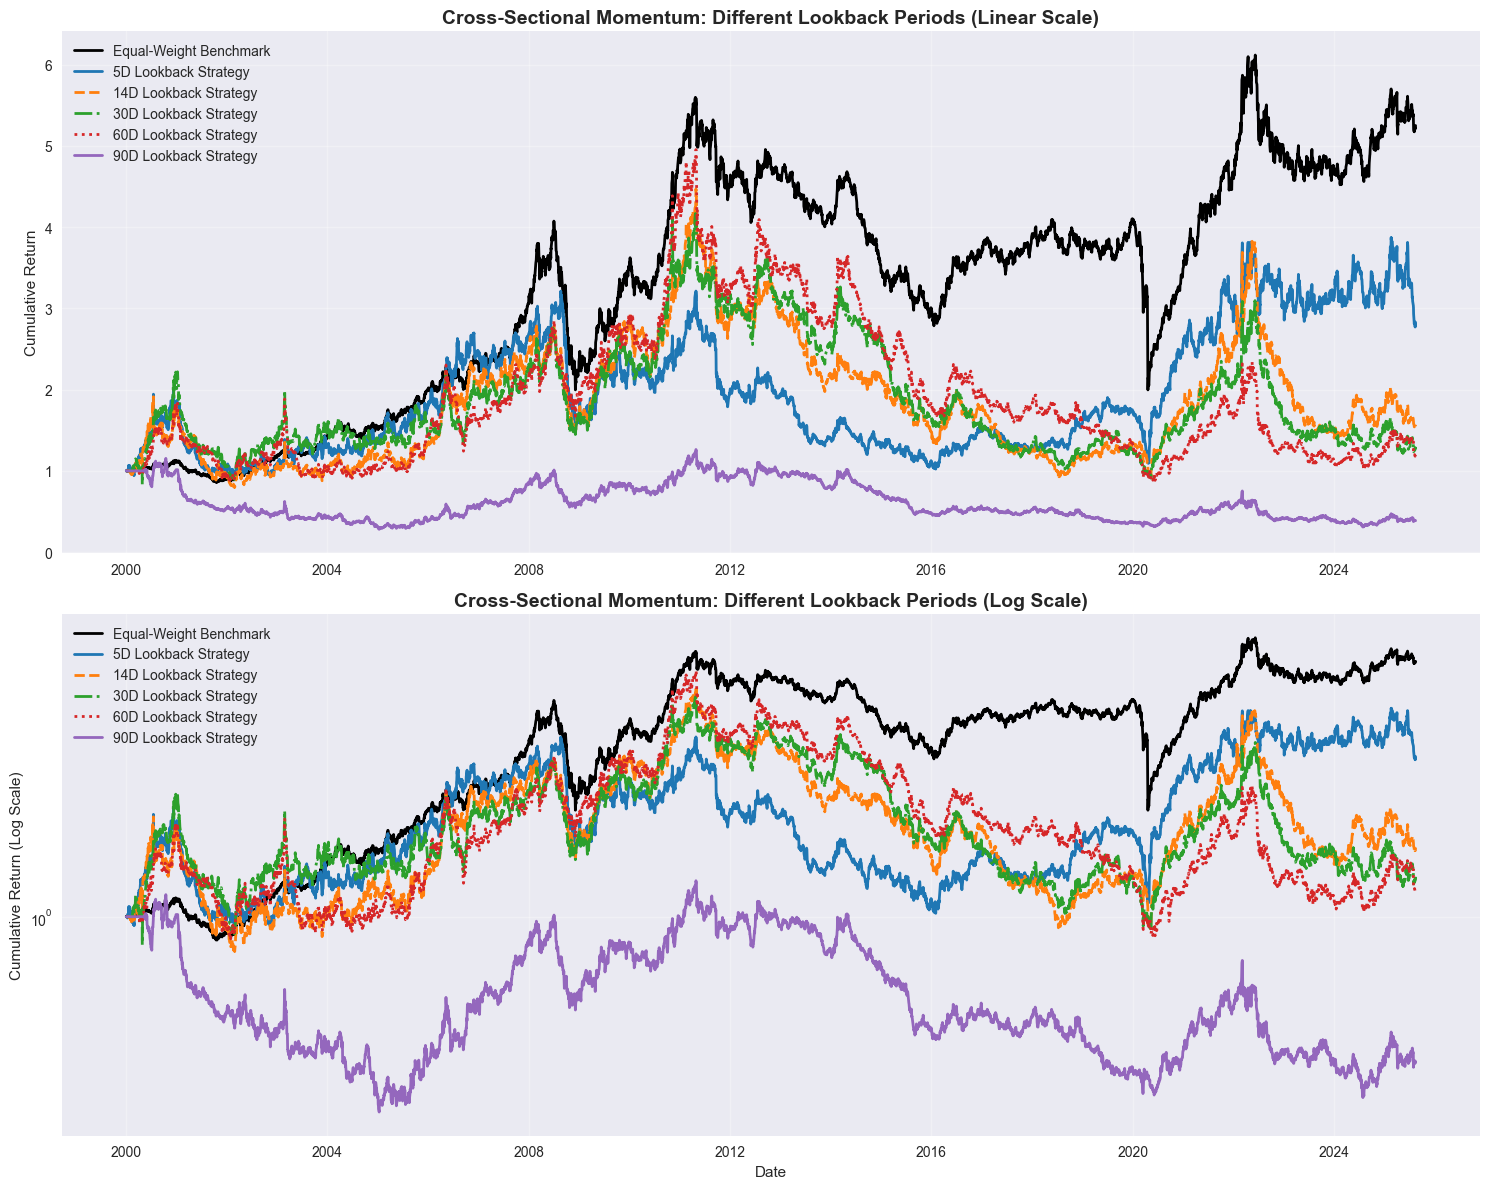

In [5]:
# Plot equity curves for different lookback periods
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Colors and styles for plotting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
linestyles = ['-', '--', '-.', ':', '-']

# Linear scale equity curves
benchmark_cumulative = results['5D']['benchmark_cumulative']
ax1.plot(benchmark_cumulative.index, benchmark_cumulative.values, 
         color='black', linewidth=2, label='Equal-Weight Benchmark')

for i, label in enumerate(lookback_labels):
    strategy_cumulative = results[label]['strategy_cumulative']
    ax1.plot(strategy_cumulative.index, strategy_cumulative.values, 
             color=colors[i], linestyle=linestyles[i], linewidth=2, 
             label=f'{label} Lookback Strategy')

ax1.set_title('Cross-Sectional Momentum: Different Lookback Periods (Linear Scale)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Cumulative Return')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Log scale equity curves for better comparison
ax2.plot(benchmark_cumulative.index, benchmark_cumulative.values, 
         color='black', linewidth=2, label='Equal-Weight Benchmark')

for i, label in enumerate(lookback_labels):
    strategy_cumulative = results[label]['strategy_cumulative']
    ax2.plot(strategy_cumulative.index, strategy_cumulative.values, 
             color=colors[i], linestyle=linestyles[i], linewidth=2, 
             label=f'{label} Lookback Strategy')

ax2.set_yscale('log')
ax2.set_title('Cross-Sectional Momentum: Different Lookback Periods (Log Scale)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Cumulative Return (Log Scale)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Rolling Performance Analysis

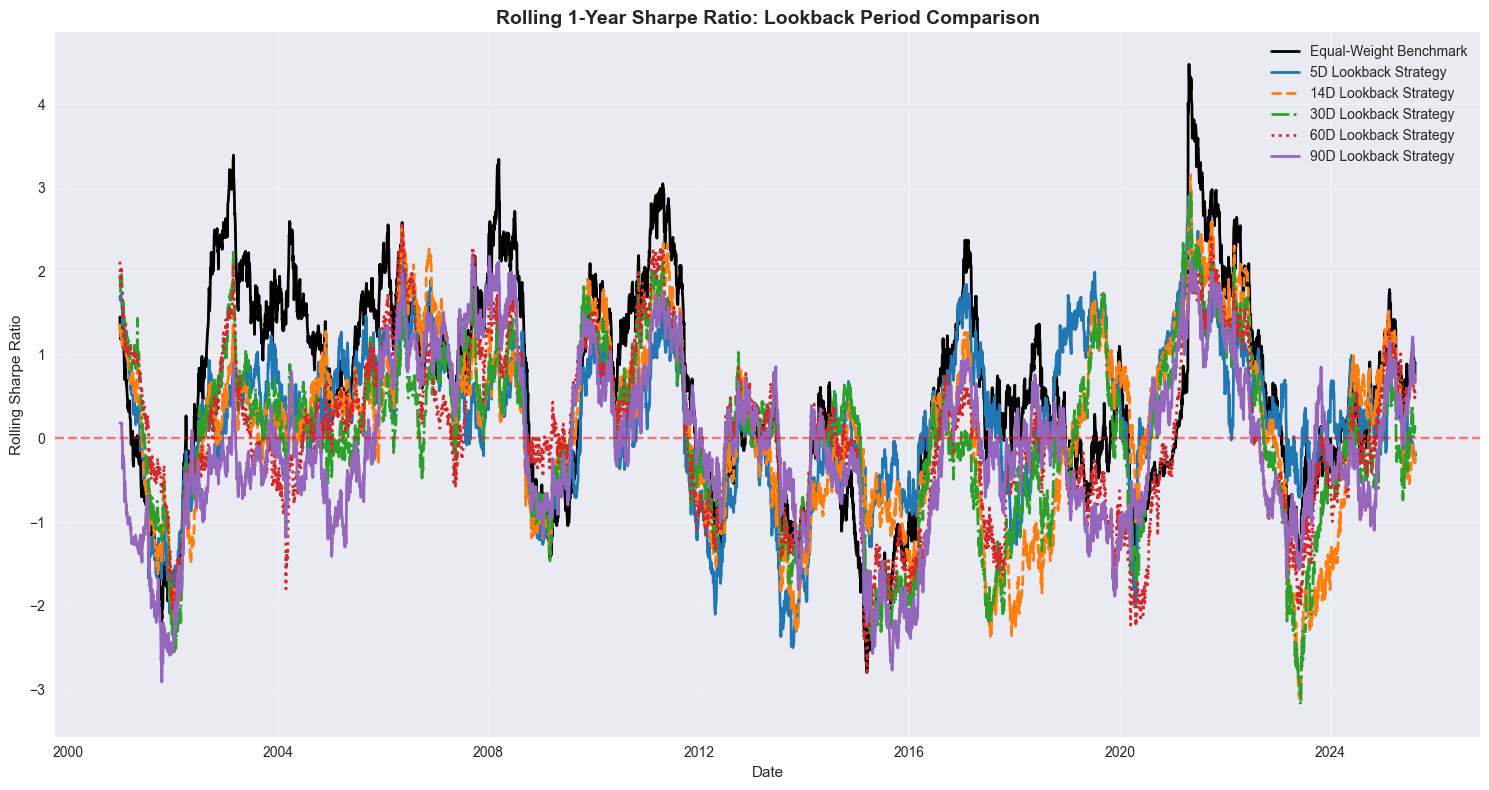

In [6]:
# Calculate rolling Sharpe ratios (252-day window = 1 year)
fig, ax = plt.subplots(figsize=(15, 8))

window = 252  # 1 year rolling window for daily data

# Benchmark rolling Sharpe
benchmark_returns = results['5D']['benchmark_returns'].dropna()
benchmark_rolling_sharpe = benchmark_returns.rolling(window).mean() / benchmark_returns.rolling(window).std() * np.sqrt(252)

ax.plot(benchmark_rolling_sharpe.index, benchmark_rolling_sharpe.values, 
        color='black', linewidth=2, label='Equal-Weight Benchmark')

# Strategy rolling Sharpe ratios for different lookback periods
for i, label in enumerate(lookback_labels):
    strategy_returns = results[label]['strategy_returns'].dropna()
    strategy_rolling_sharpe = strategy_returns.rolling(window).mean() / strategy_returns.rolling(window).std() * np.sqrt(252)
    
    ax.plot(strategy_rolling_sharpe.index, strategy_rolling_sharpe.values, 
            color=colors[i], linestyle=linestyles[i], linewidth=2, 
            label=f'{label} Lookback Strategy')

ax.set_title('Rolling 1-Year Sharpe Ratio: Lookback Period Comparison', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Rolling Sharpe Ratio')
ax.legend()
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 6. Lookback Period Impact Analysis

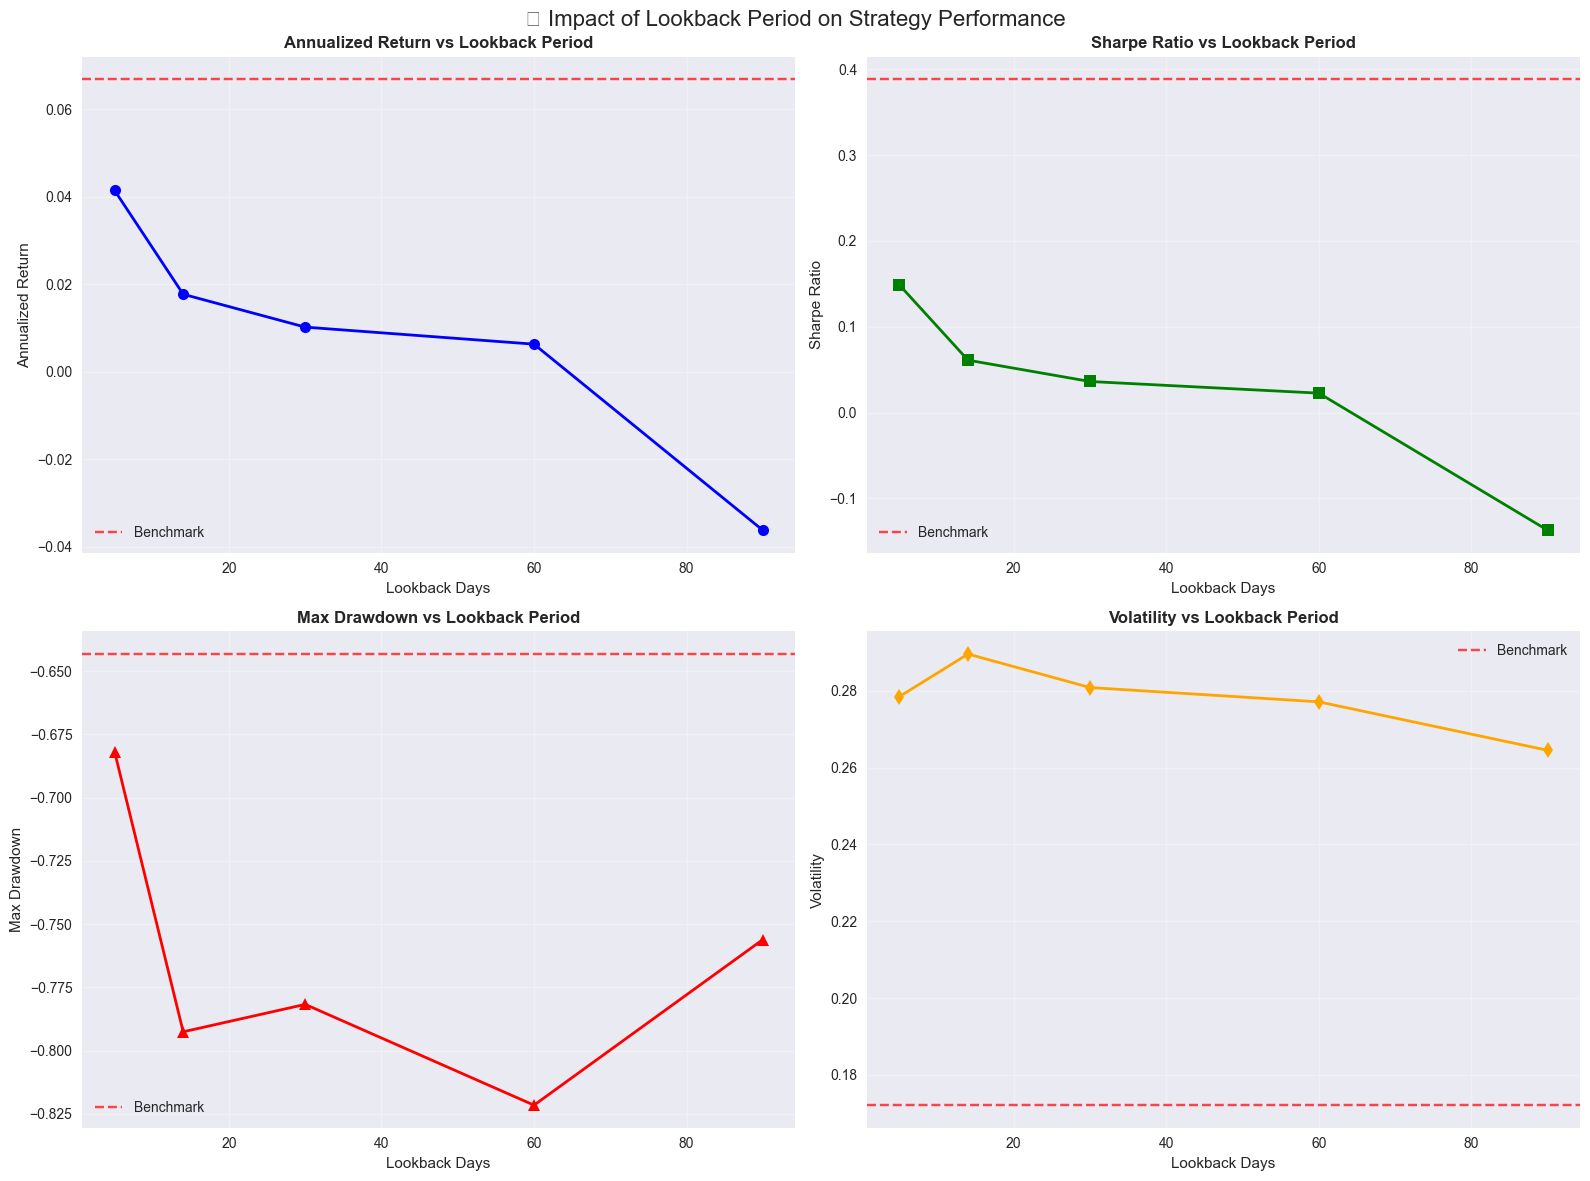

📈 LOOKBACK PERIOD IMPACT SUMMARY
🏆 Best Return: 5 days (4.14%)
⚡ Best Sharpe: 5 days (0.149)
🛡️ Best Drawdown: 5 days (-68.18%)
\n📊 Trend Analysis:
   • Returns: Decreasing with longer lookback periods
   • Sharpe: Deteriorating with longer lookback periods


In [7]:
# Analyze the impact of different lookback periods
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Extract strategy-only performance metrics
strategy_columns = [col for col in metrics_comparison.columns if 'Lookback Strategy' in col]
strategy_metrics = metrics_comparison[strategy_columns]

# Extract lookback days for x-axis
lookback_days_list = [5, 14, 30, 60, 90]

# 1. Annualized Return vs Lookback Period
returns = [metrics_comparison.loc['Annualized Return', f'{label} Lookback Strategy'] for label in lookback_labels]
axes[0,0].plot(lookback_days_list, returns, 'o-', linewidth=2, markersize=8, color='blue')
axes[0,0].axhline(y=metrics_comparison.loc['Annualized Return', 'Equal-Weight Benchmark'], 
                  color='red', linestyle='--', alpha=0.7, label='Benchmark')
axes[0,0].set_title('Annualized Return vs Lookback Period', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Lookback Days')
axes[0,0].set_ylabel('Annualized Return')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].legend()

# 2. Sharpe Ratio vs Lookback Period
sharpes = [metrics_comparison.loc['Sharpe Ratio', f'{label} Lookback Strategy'] for label in lookback_labels]
axes[0,1].plot(lookback_days_list, sharpes, 's-', linewidth=2, markersize=8, color='green')
axes[0,1].axhline(y=metrics_comparison.loc['Sharpe Ratio', 'Equal-Weight Benchmark'], 
                  color='red', linestyle='--', alpha=0.7, label='Benchmark')
axes[0,1].set_title('Sharpe Ratio vs Lookback Period', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Lookback Days')
axes[0,1].set_ylabel('Sharpe Ratio')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].legend()

# 3. Max Drawdown vs Lookback Period
drawdowns = [metrics_comparison.loc['Max Drawdown', f'{label} Lookback Strategy'] for label in lookback_labels]
axes[1,0].plot(lookback_days_list, drawdowns, '^-', linewidth=2, markersize=8, color='red')
axes[1,0].axhline(y=metrics_comparison.loc['Max Drawdown', 'Equal-Weight Benchmark'], 
                  color='red', linestyle='--', alpha=0.7, label='Benchmark')
axes[1,0].set_title('Max Drawdown vs Lookback Period', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Lookback Days')
axes[1,0].set_ylabel('Max Drawdown')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].legend()

# 4. Volatility vs Lookback Period
volatilities = [metrics_comparison.loc['Volatility', f'{label} Lookback Strategy'] for label in lookback_labels]
axes[1,1].plot(lookback_days_list, volatilities, 'd-', linewidth=2, markersize=8, color='orange')
axes[1,1].axhline(y=metrics_comparison.loc['Volatility', 'Equal-Weight Benchmark'], 
                  color='red', linestyle='--', alpha=0.7, label='Benchmark')
axes[1,1].set_title('Volatility vs Lookback Period', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Lookback Days')
axes[1,1].set_ylabel('Volatility')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].legend()

plt.suptitle('📊 Impact of Lookback Period on Strategy Performance', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

# Summary statistics
print("📈 LOOKBACK PERIOD IMPACT SUMMARY")
print("=" * 50)
best_return_idx = np.argmax(returns)
best_sharpe_idx = np.argmax(sharpes)
best_drawdown_idx = np.argmax(drawdowns)  # Closest to 0

print(f"🏆 Best Return: {lookback_days_list[best_return_idx]} days ({returns[best_return_idx]:.2%})")
print(f"⚡ Best Sharpe: {lookback_days_list[best_sharpe_idx]} days ({sharpes[best_sharpe_idx]:.3f})")
print(f"🛡️ Best Drawdown: {lookback_days_list[best_drawdown_idx]} days ({drawdowns[best_drawdown_idx]:.2%})")

# Trend analysis
print(f"\\n📊 Trend Analysis:")
if returns[-1] > returns[0]:
    print(f"   • Returns: Increasing with longer lookback periods")
else:
    print(f"   • Returns: Decreasing with longer lookback periods")
    
if sharpes[-1] > sharpes[0]:
    print(f"   • Sharpe: Improving with longer lookback periods")
else:
    print(f"   • Sharpe: Deteriorating with longer lookback periods")

## 7. Strategy Statistics Summary

In [9]:
# Create comprehensive summary statistics for different lookback periods
print("📈 CROSS-SECTIONAL MOMENTUM STRATEGY SUMMARY (Lookback Period Analysis)")
print("=" * 80)

# Find the best performing strategy across all metrics
best_sharpe_strategy = metrics_comparison.loc['Sharpe Ratio'].idxmax()
best_return_strategy = metrics_comparison.loc['Annualized Return'].idxmax()

print(f"🏆 Best Sharpe Ratio: {best_sharpe_strategy}")
print(f"   Sharpe: {metrics_comparison.loc['Sharpe Ratio', best_sharpe_strategy]:.4f}")
print(f"   Annual Return: {metrics_comparison.loc['Annualized Return', best_sharpe_strategy]:.2%}")
print(f"   Volatility: {metrics_comparison.loc['Volatility', best_sharpe_strategy]:.2%}")
print(f"   Max Drawdown: {metrics_comparison.loc['Max Drawdown', best_sharpe_strategy]:.2%}")

print(f"\\n💰 Best Return Strategy: {best_return_strategy}")
print(f"   Annual Return: {metrics_comparison.loc['Annualized Return', best_return_strategy]:.2%}")
print(f"   Sharpe: {metrics_comparison.loc['Sharpe Ratio', best_return_strategy]:.4f}")
print(f"   Max Drawdown: {metrics_comparison.loc['Max Drawdown', best_return_strategy]:.2%}")

# Benchmark comparison
benchmark_sharpe = metrics_comparison.loc['Sharpe Ratio', 'Equal-Weight Benchmark']
benchmark_return = metrics_comparison.loc['Annualized Return', 'Equal-Weight Benchmark']

print(f"\\n📊 Benchmark Performance:")
print(f"   Annual Return: {benchmark_return:.2%}")
print(f"   Sharpe: {benchmark_sharpe:.4f}")

print(f"\\n🎯 Strategy vs Benchmark (All Lookback Periods):")
winning_strategies = 0
for label in lookback_labels:
    strategy_sharpe = metrics_comparison.loc['Sharpe Ratio', f'{label} Lookback Strategy']
    sharpe_improvement = strategy_sharpe - benchmark_sharpe
    beats_benchmark = "✅" if strategy_sharpe > benchmark_sharpe else "❌"
    if strategy_sharpe > benchmark_sharpe:
        winning_strategies += 1
    print(f"   {label} ({lookback_periods[lookback_labels.index(label)]} days): {sharpe_improvement:+.4f} {beats_benchmark}")

print(f"\\n🏆 Overall Performance:")
print(f"   • Strategies beating benchmark: {winning_strategies}/{len(lookback_labels)}")

# Initialize optimal_days as None
optimal_days = None
optimal_lookback = best_sharpe_strategy.split()[0] if best_sharpe_strategy != 'Equal-Weight Benchmark' else None

if optimal_lookback and optimal_lookback in lookback_labels:
    optimal_days = lookback_periods[lookback_labels.index(optimal_lookback)]
    print(f"   • Optimal lookback period: {optimal_days} days ({optimal_lookback})")
    
    if optimal_days <= 14:
        momentum_type = "Short-term momentum (noise trading/reversal prone)"
    elif optimal_days <= 30:
        momentum_type = "Medium-term momentum (balanced approach)"
    else:
        momentum_type = "Long-term momentum (trend following)"
        
    print(f"   • Momentum characteristic: {momentum_type}")
else:
    print(f"   • No momentum strategy beats the benchmark")

print(f"\\n📝 Key Insights (Daily Rebalancing with Rolling Lookback):")
print(f"   • Cross-sectional momentum {'works' if winning_strategies > 0 else 'does not work'} for commodities")
if optimal_days:
    print(f"   • {'Shorter' if optimal_days <= 30 else 'Longer'} lookback periods show better performance")
else:
    print(f"   • Benchmark outperforms all momentum strategies")
print(f"   • Daily rebalancing with rolling lookback captures momentum patterns")

📈 CROSS-SECTIONAL MOMENTUM STRATEGY SUMMARY (Lookback Period Analysis)
🏆 Best Sharpe Ratio: Equal-Weight Benchmark
   Sharpe: 0.3885
   Annual Return: 6.69%
   Volatility: 17.21%
   Max Drawdown: -64.33%
\n💰 Best Return Strategy: Equal-Weight Benchmark
   Annual Return: 6.69%
   Sharpe: 0.3885
   Max Drawdown: -64.33%
\n📊 Benchmark Performance:
   Annual Return: 6.69%
   Sharpe: 0.3885
\n🎯 Strategy vs Benchmark (All Lookback Periods):
   5D (5 days): -0.2398 ❌
   14D (14 days): -0.3274 ❌
   30D (30 days): -0.3523 ❌
   60D (60 days): -0.3659 ❌
   90D (90 days): -0.5255 ❌
\n🏆 Overall Performance:
   • Strategies beating benchmark: 0/5
   • No momentum strategy beats the benchmark
\n📝 Key Insights (Daily Rebalancing with Rolling Lookback):
   • Cross-sectional momentum does not work for commodities
   • Benchmark outperforms all momentum strategies
   • Daily rebalancing with rolling lookback captures momentum patterns
